In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


In [92]:
from google.colab import files
uploaded = files.upload()

Saving Diabetes_prediction.csv to Diabetes_prediction (5).csv


EDA Process to check and understand the data

In [93]:
#Readig the data
df=pd.read_csv("Diabetes_prediction.csv")
print(df.head())
#Statistics
print(df.shape)
print(df.info())
print(df.describe())
#Checking for the empty cells
print(df.isnull().sum())

   Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0  
(1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------        

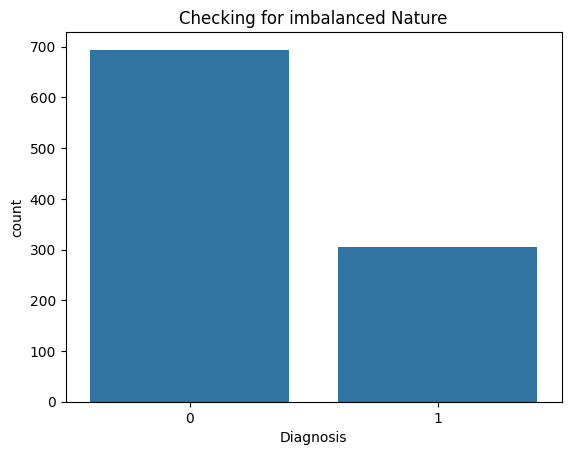

Diagnosis
0    694
1    306
Name: count, dtype: int64


In [94]:
#Checking for the imbalanced dataset
plt.figure()
plt.title("Checking for imbalanced Nature")
sns.countplot(x=df["Diagnosis"])
plt.show()

#Checking for Numbers
print(df["Diagnosis"].value_counts())

     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0              2  115.863387      56.410731      24.336736   94.385783   
1              2   92.490122      70.615520      23.443591  138.652426   
2              1   88.141469      63.262618      23.404364  149.358082   
3              2  108.453101      67.793632      20.751580  108.751638   
4              1  127.849443      94.725685      22.603078   25.269987   
..           ...         ...            ...            ...         ...   
995            1  103.496355      41.059401      24.930299   43.675978   
996            1   60.714150      64.082842      24.689064  111.562745   
997            0   97.597727      64.122312      22.140339  108.138552   
998            0   66.775137      55.908797      24.885274  219.521484   
999            0   87.647268      69.111593      25.621266  134.335745   

           BMI  DiabetesPedigreeFunction        Age  
0    26.455940                  0.272682  20.100494  
1  

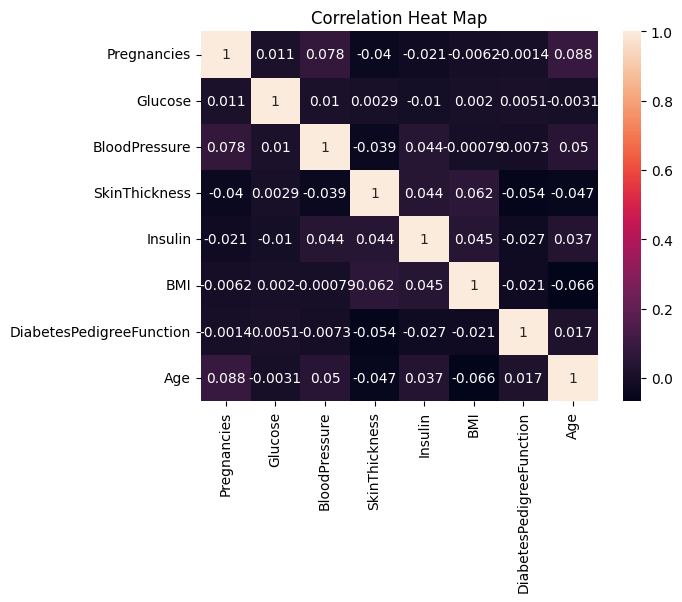

In [95]:
#Splitting the data into features and Target
Y=df["Diagnosis"]

df2=df.drop(columns="Diagnosis")
X=df2

print(X)

#Checking for correlation
correlation=X.corr()

#Plotting heat map
plt.figure()
plt.title("Correlation Heat Map")
sns.heatmap(correlation,annot=True)
plt.show()

In [96]:
#Train and Test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

#Standardization

scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

print(X_train_scaled)

(800, 8)
(200, 8)
[[-0.58223746  0.62764104 -0.40743681 ...  1.04420071  1.56914571
   0.75356053]
 [ 0.90353596 -2.15244602 -1.43582547 ... -1.74439877  1.67283329
   0.79383676]
 [-0.58223746  0.38481901 -0.02549252 ... -0.02447077  0.59180527
  -1.31552733]
 ...
 [ 0.16064925  0.89539951  1.5775824  ...  0.47614935 -1.19587271
  -1.13844948]
 [-1.32512417 -1.42714793 -0.55274107 ... -0.4686228   1.3147194
  -0.18125135]
 [ 0.90353596  0.45264274  0.08381205 ...  0.24718342 -1.0433463
   1.55775298]]


In [97]:
#Model Training
param_grid={"n_neighbors":range(3,21)}
print(param_grid)
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train_scaled,Y_train)

#KNN_parameters
best_k=grid.best_params_["n_neighbors"]
print(best_k)

best_knn=grid.best_estimator_
print(best_knn)

#Prediction
Y_pred=best_knn.predict(X_test_scaled)
print(Y_pred)

#Dictionary_Prediction
dic_Compare={"Actual_Value":Y_test,
             "Predicted_Value":Y_pred}
df_Compare=pd.DataFrame(dic_Compare)
print(df_Compare)


{'n_neighbors': range(3, 21)}
20
KNeighborsClassifier(n_neighbors=20)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     Actual_Value  Predicted_Value
521             0                0
737             0                0
740             0                0
660             0                0
411             0                0
..            ...              ...
408             0                0
332             0                0
208             1                0
613             1                0
78              0                0

[200 rows x 2 columns]


[[135   2]
 [ 61   2]]
0.685
0.5
0.031746031746031744
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       137
           1       0.50      0.03      0.06        63

    accuracy                           0.69       200
   macro avg       0.59      0.51      0.44       200
weighted avg       0.63      0.69      0.57       200



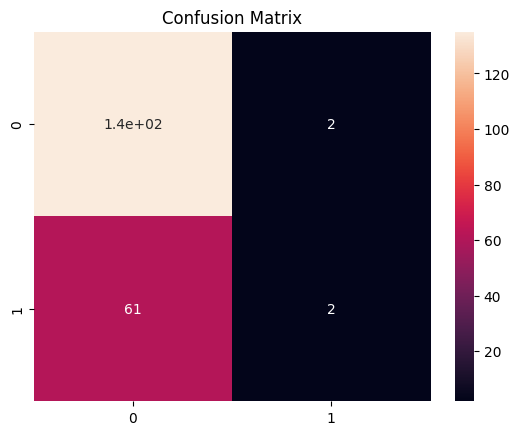

In [98]:
#Evaluation_Metrics
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

#Confusion Metrics
plt.figure()
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.show()

Improving the Quality of Prediction

In [99]:
#Applying_SMOTE
sm=SMOTE(random_state=42)
X_train_sm,Y_train_sm=sm.fit_resample(X_train,Y_train)
print(Y_train_sm)
c1=pd.Series(Y_train_sm).value_counts()
print(c1)

0       1
1       0
2       0
3       1
4       0
       ..
1109    1
1110    1
1111    1
1112    1
1113    1
Name: Diagnosis, Length: 1114, dtype: int64
Diagnosis
1    557
0    557
Name: count, dtype: int64


In [100]:
print(X_train_sm)
#Applying Standardization again
X_train_sm_scaled=scalar.fit_transform(X_train_sm)
grid.fit(X_train_sm_scaled,Y_train_sm)

best_k2=grid.best_params_["n_neighbors"]
best_knn2=grid.best_estimator_
print(best_knn2)

      Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0               1  111.441856      66.454235      23.479227   44.278730   
1               3   58.066486      52.373287      22.845978  198.619401   
2               1  106.779874      71.683909      21.474644  145.709109   
3               3  130.406785      85.942208      24.646644  -83.329864   
4               3  130.271959      69.139865      23.685052   80.406452   
...           ...         ...            ...            ...         ...   
1109            2   95.674126      40.323878      22.184412  142.199535   
1110            1  114.945780      50.034196      23.404013   73.533374   
1111            1  113.932251      93.592657      24.380617   66.354702   
1112            1   86.315772      63.303764      22.881753  153.734230   
1113            1   94.903539      51.882948      23.449792  -21.052954   

            BMI  DiabetesPedigreeFunction        Age  
0     29.281046                  0.755596  5

In [101]:
#Prediction
Y_pred2=best_knn.predict(X_test_scaled)
print(Y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [102]:
#Checking
#Dictionary_Prediction
dic_Compare2={"Actual_Value":Y_test,
             "Predicted_Value":Y_pred2}
df_Compare2=pd.DataFrame(dic_Compare2)
print(df_Compare2)

     Actual_Value  Predicted_Value
521             0                0
737             0                0
740             0                0
660             0                0
411             0                0
..            ...              ...
408             0                0
332             0                0
208             1                0
613             1                0
78              0                0

[200 rows x 2 columns]


[[135   2]
 [ 61   2]]
0.685
0.5
0.031746031746031744
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       137
           1       0.50      0.03      0.06        63

    accuracy                           0.69       200
   macro avg       0.59      0.51      0.44       200
weighted avg       0.63      0.69      0.57       200



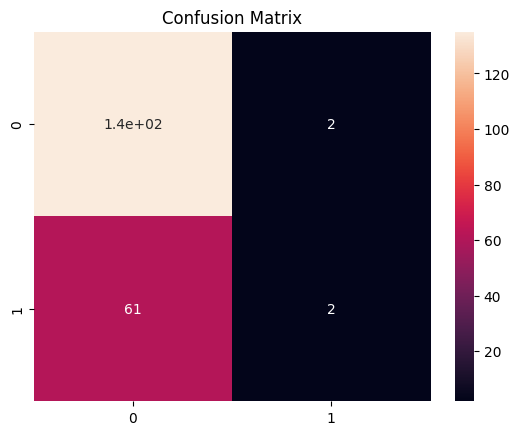

In [104]:
#Evaluation Metrics
print(confusion_matrix(Y_test,Y_pred2))
print(accuracy_score(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))
print(recall_score(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))

#Confusion Metrics
plt.figure()
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test,Y_pred2),annot=True)
plt.show()